In [6]:
import os
import shutil
os.makedirs("/content/data/cats", exist_ok=True)
os.makedirs("/content/data/dogs", exist_ok=True)
for filename in os.listdir("/content/cat_dog_data/cats_set"):
    if filename.endswith(".jpg"):
        shutil.move(f"/content/cat_dog_data/cats_set/{filename}", f"/content/data/cats/{filename}")
for filename in os.listdir("/content/cat_dog_data/dogs_set"):
    if filename.endswith(".jpg"):
        shutil.move(f"/content/cat_dog_data/dogs_set/{filename}", f"/content/data/dogs/{filename}")


In [7]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
train_ds = image_dataset_from_directory(
    directory="/content/data",
    labels="inferred",
    label_mode="binary",
    image_size=(128, 128),
    batch_size=32
)

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels[:5])



Found 1000 files belonging to 2 classes.
(32, 128, 128, 3)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


In [8]:
len(train_ds)


32

In [11]:
import matplotlib.pyplot as plt


In [13]:
val_size = int(0.2 * len(train_ds))
train_ds_final = train_ds.skip(val_size)
val_ds = train_ds.take(val_size)


In [14]:
train_ds_final = train_ds_final.shuffle(1000)


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_ds_final,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 987ms/step - accuracy: 0.5337 - loss: 1.0629 - val_accuracy: 0.4792 - val_loss: 0.6929
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 957ms/step - accuracy: 0.5135 - loss: 0.6921 - val_accuracy: 0.5729 - val_loss: 0.6814
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 971ms/step - accuracy: 0.5593 - loss: 0.6789 - val_accuracy: 0.6146 - val_loss: 0.6612
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6316 - loss: 0.6531 - val_accuracy: 0.6042 - val_loss: 0.6665
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7052 - loss: 0.5625 - val_accuracy: 0.6250 - val_loss: 0.6117
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 945ms/step - accuracy: 0.7603 - loss: 0.5022 - val_accuracy: 0.6667 - val_loss: 0.6552
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 906ms/step - accuracy: 0.7713 - loss: 0.4888 - val_accuracy: 0.7031 - val_loss: 0.5390
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 938ms/step - accuracy: 0.8196 - loss: 0.4269 - val_accuracy: 

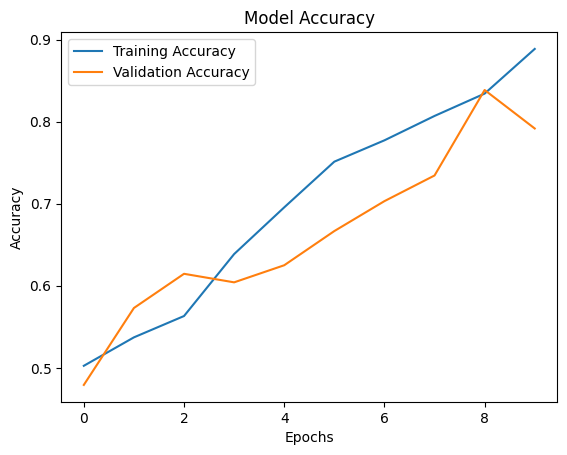

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
plt.savefig("accuracy_plot.png")


<Figure size 640x480 with 0 Axes>

In [23]:

training_accuracy = history.history['accuracy'][-1] * 100
validation_accuracy = history.history['val_accuracy'][-1] * 100

print(f"Final Training Accuracy: {training_accuracy:.2f}%")
print(f"Final Validation Accuracy: {validation_accuracy:.2f}%")


Final Training Accuracy: 88.86%
Final Validation Accuracy: 79.17%


In [54]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import csv
img_dir = '/content/test/test'
img_files = sorted([
    os.path.join(img_dir, f)
    for f in os.listdir(img_dir)
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
])
print("Found images:", img_files)
img_list = []
for img_path in img_files:
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_list.append(img_array)
batch_images = tf.convert_to_tensor(img_list)
predictions = model.predict(batch_images)
print("Predictions:", predictions)
results = []
for fname, pred in zip(img_files, predictions):
    label = 'dog' if pred[0] >= 0.5 else 'cat'
    print(f"{os.path.basename(fname)} => {label}")
    results.append([os.path.basename(fname), label])
with open('submission.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filename', 'prediction'])
    writer.writerows(results)
print("✅ CSV written successfully.")


Found images: ['/content/test/test/1.jpg', '/content/test/test/10.jpg', '/content/test/test/11.jpg', '/content/test/test/12.jpg', '/content/test/test/13.jpg', '/content/test/test/14.jpg', '/content/test/test/15.jpg', '/content/test/test/16.jpg', '/content/test/test/17.jpg', '/content/test/test/18.jpg', '/content/test/test/19.jpg', '/content/test/test/2.jpg', '/content/test/test/20.jpg', '/content/test/test/3.jpg', '/content/test/test/4.jpg', '/content/test/test/5.jpg', '/content/test/test/6.jpg', '/content/test/test/7.jpg', '/content/test/test/8.jpg', '/content/test/test/9.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predictions: [[9.7829741e-01]
 [2.8238302e-01]
 [6.5143139e-04]
 [9.4062984e-01]
 [9.2177588e-01]
 [9.7570824e-04]
 [8.2082373e-01]
 [4.1713025e-02]
 [9.5081705e-01]
 [2.9666591e-04]
 [6.6190952e-01]
 [9.8769623e-01]
 [9.4122612e-01]
 [1.1680647e-01]
 [7.8861964e-01]
 [2.9001278e-03]
 [6.7029309e-01]
 [7.3491909e-02]
 [4.5368969e-01]
 [1.4663138e-04]]
1.jpg => dog
10.jpg =